### BADASS Analysis - can we tell the difference between green, black and grey tea types, and extrapolate to classify new varieties of these tea types that the model hasn't been trained on?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

In [3]:
tea_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/Tea/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/Tea/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/Tea/?y


Locate xlsx files

In [4]:
tea_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [5]:
tea_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Black_Pukka_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Mands_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Coop_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Green_Handb_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Tesco_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Black_Twinings_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Twinings_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Green_Twinings_repeat_1.xlsx
Pars

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Joes_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Clipper_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Green_Tetley_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Devonshire_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Black_Dragonfly_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Black_Sainsburysgold_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Asda_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Black_Tesco_repeat_

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Green_Clipper_repeat_5.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Green_Sainsburys_repeat_5.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Clipper_repeat_5.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Green_Tetley_repeat_5.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Tesco_repeat_5.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Black_Twinings_repeat_5.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Green_Handb_repeat_5.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Tea_data/Reformatted_csvs/Grey_Coop_repeat_5.xlsx

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [6]:
tea_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: Green_Doubledragon, 0 (flagged readings = Hept: 0.09326123473125336) 
 Outlier excluded from final output dataset: Green_Qi, 2 (flagged readings = Hex: 0.07445972625354225) 


In [7]:
tea_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.799934,0.782552,0.884925,0.857972,0.883176,0.797116,0.727336,0.642821,0.386611,0.695764,0.470576,0.423649,0.493452,0.573935,Black_Pukka
1,0.670283,0.785112,0.754554,0.819698,0.825544,0.765675,0.702891,0.664229,0.324982,0.651277,0.400728,0.322405,0.440965,0.553846,Black_Pukka
2,0.675169,0.778761,0.829250,0.854040,0.839116,0.793627,0.658490,0.548969,0.281191,0.616150,0.387809,0.469989,0.410056,0.558376,Black_Pukka
3,0.717578,0.826516,0.820345,0.817102,0.860135,0.633061,0.644025,0.578720,0.378879,0.646210,0.321354,0.512388,0.454555,0.518257,Black_Pukka
4,0.683264,0.742228,0.784995,0.787644,0.776585,0.623095,0.572391,0.417389,0.258867,0.590757,0.269575,0.380949,0.399963,0.552252,Black_Pukka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.606018,0.772789,0.755061,0.833325,0.841379,0.744931,0.691084,0.682054,0.394449,0.611409,0.483508,0.379386,0.475382,0.537676,Grey_Mands
174,0.577666,0.691843,0.798711,0.819726,0.796871,0.667317,0.607633,0.429234,0.296398,0.504007,0.340834,0.431582,0.346671,0.533019,Grey_Mands
175,0.671619,0.747449,0.814276,0.810524,0.830851,0.601194,0.599588,0.513177,0.388179,0.625587,0.324221,0.454039,0.404894,0.457649,Grey_Mands
176,0.640472,0.731288,0.747672,0.778894,0.753295,0.690279,0.573313,0.420739,0.247480,0.568650,0.261786,0.380741,0.367600,0.430244,Grey_Mands


Makes dataframe of teas merged by type ("green", "black" and "grey")

In [8]:
merged_tea_fluor_data = copy.deepcopy(tea_fluor_data.ml_fluor_data)
merged_tea_fluor_data['Analyte_class'] = [merged_tea_fluor_data['Analyte'][n].split('_')[0]
                                          for n in range(merged_tea_fluor_data.shape[0])]
merged_tea_fluor_data['Analyte_subclass'] = copy.deepcopy(merged_tea_fluor_data['Analyte'])
merged_tea_fluor_data = merged_tea_fluor_data.drop('Analyte', axis=1)

In [9]:
merged_tea_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte_class,Analyte_subclass
0,0.799934,0.782552,0.884925,0.857972,0.883176,0.797116,0.727336,0.642821,0.386611,0.695764,0.470576,0.423649,0.493452,0.573935,Black,Black_Pukka
1,0.670283,0.785112,0.754554,0.819698,0.825544,0.765675,0.702891,0.664229,0.324982,0.651277,0.400728,0.322405,0.440965,0.553846,Black,Black_Pukka
2,0.675169,0.778761,0.829250,0.854040,0.839116,0.793627,0.658490,0.548969,0.281191,0.616150,0.387809,0.469989,0.410056,0.558376,Black,Black_Pukka
3,0.717578,0.826516,0.820345,0.817102,0.860135,0.633061,0.644025,0.578720,0.378879,0.646210,0.321354,0.512388,0.454555,0.518257,Black,Black_Pukka
4,0.683264,0.742228,0.784995,0.787644,0.776585,0.623095,0.572391,0.417389,0.258867,0.590757,0.269575,0.380949,0.399963,0.552252,Black,Black_Pukka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.606018,0.772789,0.755061,0.833325,0.841379,0.744931,0.691084,0.682054,0.394449,0.611409,0.483508,0.379386,0.475382,0.537676,Grey,Grey_Mands
174,0.577666,0.691843,0.798711,0.819726,0.796871,0.667317,0.607633,0.429234,0.296398,0.504007,0.340834,0.431582,0.346671,0.533019,Grey,Grey_Mands
175,0.671619,0.747449,0.814276,0.810524,0.830851,0.601194,0.599588,0.513177,0.388179,0.625587,0.324221,0.454039,0.404894,0.457649,Grey,Grey_Mands
176,0.640472,0.731288,0.747672,0.778894,0.753295,0.690279,0.573313,0.420739,0.247480,0.568650,0.261786,0.380741,0.367600,0.430244,Grey,Grey_Mands


Generates "representative" fingerprint for each class (by calculating the median value for each feature)

Classes

Black


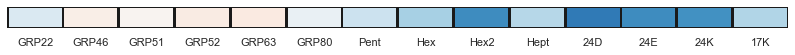

Green


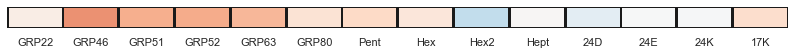

Grey


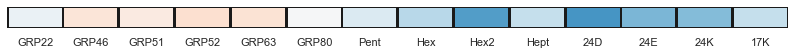

In [10]:
classes = []
for class_name in merged_tea_fluor_data['Analyte_class'].tolist():
    if not class_name in classes:
        classes.append(class_name)
merged_tea_fluor_data_x_val = merged_tea_fluor_data.drop(['Analyte_class', 'Analyte_subclass'], axis=1)
vmin = merged_tea_fluor_data_x_val.values.min()
vmax = merged_tea_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(merged_tea_fluor_data.shape[0])
                     if merged_tea_fluor_data['Analyte_class'][n] == class_name]
    repr_array = np.median(merged_tea_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=merged_tea_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Subclasses

Black_Clipper


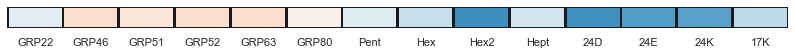

Black_Diplomat


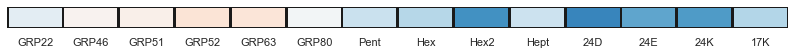

Black_Dragonfly


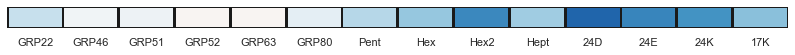

Black_Pgtips


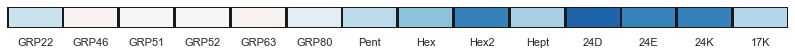

Black_Pukka


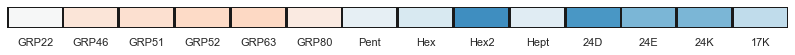

Black_Sainsburysgold


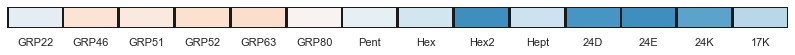

Black_Tesco


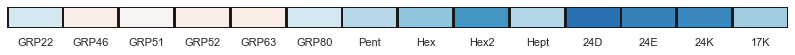

Black_Tetley


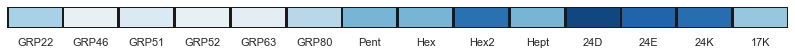

Black_Twinings


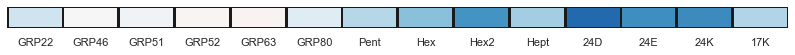

Black_Yorkshire


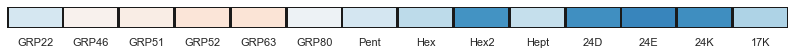

Green_Clipper


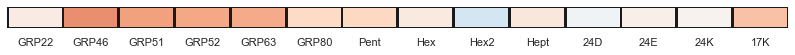

Green_Diplomat


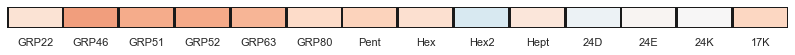

Green_Doubledragon


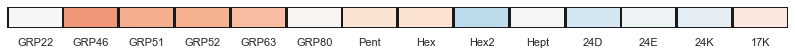

Green_Dragonfly


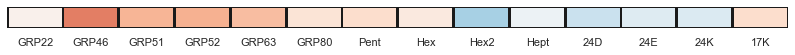

Green_Handb


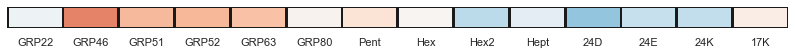

Green_Joes


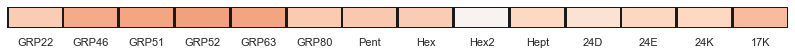

Green_Qi


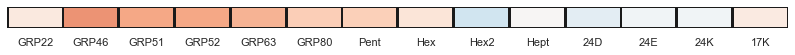

Green_Sainsburys


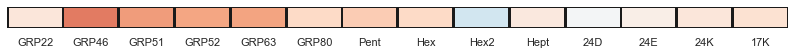

Green_Tetley


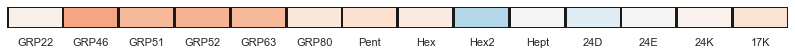

Green_Twinings


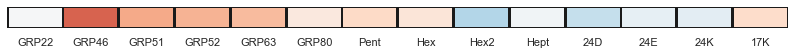

Grey_Asda


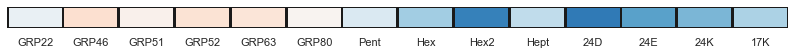

Grey_Clipper


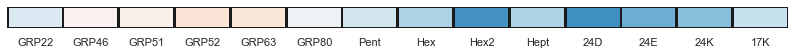

Grey_Coop


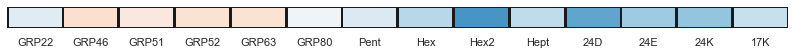

Grey_Devonshire


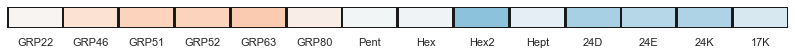

Grey_Diplomat


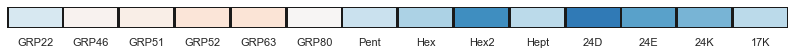

Grey_Joes


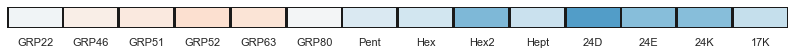

Grey_Mands


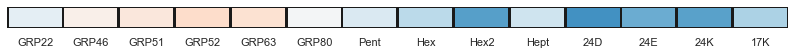

Grey_Pukka


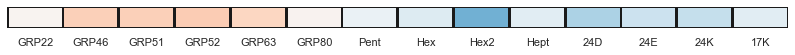

Grey_Tesco


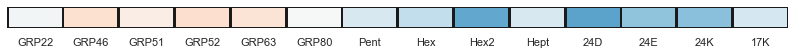

Grey_Twinings


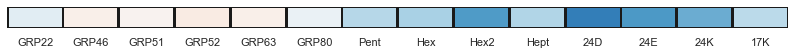

In [11]:
classes = []
for class_name in merged_tea_fluor_data['Analyte_subclass'].tolist():
    if not class_name in classes:
        classes.append(class_name)
merged_tea_fluor_data_x_val = merged_tea_fluor_data.drop(['Analyte_class', 'Analyte_subclass'], axis=1)
vmin = merged_tea_fluor_data_x_val.values.min()
vmax = merged_tea_fluor_data_x_val.values.max()

classes = sorted(classes)
for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(merged_tea_fluor_data.shape[0])
                     if merged_tea_fluor_data['Analyte_subclass'][n] == class_name]
    repr_array = np.median(merged_tea_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=merged_tea_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 features

Black


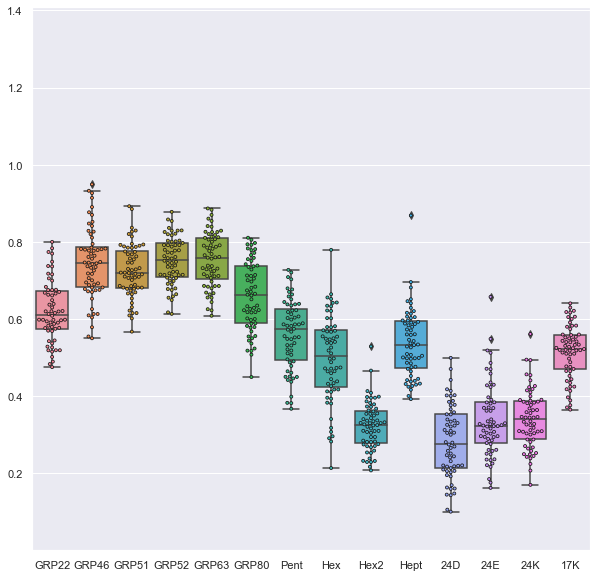

Green


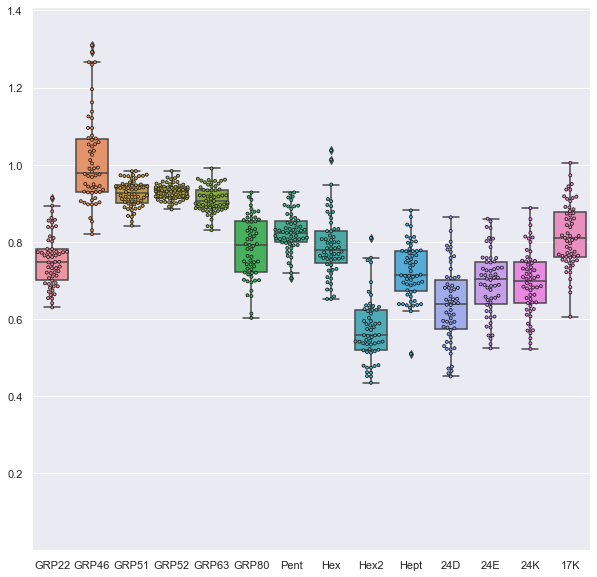

Grey


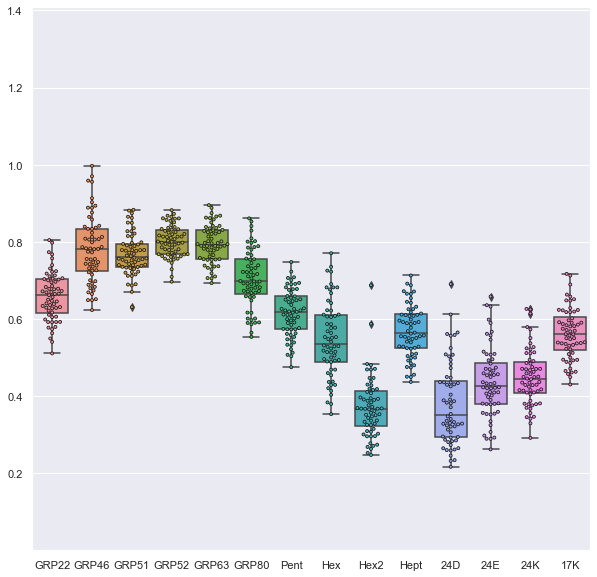

In [12]:
ymin = merged_tea_fluor_data.drop(['Analyte_class', 'Analyte_subclass'], axis=1).min().min() - 0.1
ymax = merged_tea_fluor_data.drop(['Analyte_class', 'Analyte_subclass'], axis=1).max().max() + 0.1

black_indices = [int(i) for i in range(merged_tea_fluor_data.shape[0])
                 if merged_tea_fluor_data['Analyte_class'][i] == 'Black']
green_indices = [int(i) for i in range(merged_tea_fluor_data.shape[0])
                 if merged_tea_fluor_data['Analyte_class'][i] == 'Green']
grey_indices = [int(i) for i in range(merged_tea_fluor_data.shape[0])
                if merged_tea_fluor_data['Analyte_class'][i] == 'Grey']

sns.set(rc={'figure.figsize':(10,10)})
print('Black')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=merged_tea_fluor_data.iloc[black_indices])
sns.swarmplot(data=merged_tea_fluor_data.iloc[black_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Green')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=merged_tea_fluor_data.iloc[green_indices])
sns.swarmplot(data=merged_tea_fluor_data.iloc[green_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Grey')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=merged_tea_fluor_data.iloc[grey_indices])
sns.swarmplot(data=merged_tea_fluor_data.iloc[grey_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [13]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

- Black / Green / Grey classes

First run an initial spot check to select a suitable algorithm and parameter values on **all data** (i.e. no test set kept aside)

In [14]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/Tea/'
                'BGG_class_ML_results/', fluor_data=merged_tea_fluor_data,
    classes=merged_tea_fluor_data['Analyte_class'].to_numpy(),
    subclasses=merged_tea_fluor_data['Analyte_subclass'].to_numpy(), shuffle=True
)

In [15]:
ml.split_train_test_data(randomise=False, percent_test='', test_analytes=[])

In [16]:
ml.fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte_class,Analyte_subclass
0,0.671619,0.747449,0.814276,0.810524,0.830851,0.601194,0.599588,0.513177,0.388179,0.625587,0.324221,0.454039,0.404894,0.457649,Grey,Grey_Mands
1,0.710786,0.781671,0.797248,0.850539,0.861585,0.769830,0.659587,0.770452,0.447112,0.671972,0.508275,0.420259,0.511290,0.663295,Grey,Grey_Devonshire
2,0.773283,0.755583,0.880966,0.838252,0.895209,0.754274,0.700924,0.681868,0.470867,0.691714,0.556868,0.433049,0.524016,0.617849,Grey,Grey_Devonshire
3,0.629551,0.743155,0.794645,0.831609,0.789600,0.692331,0.591129,0.735294,0.336548,0.529038,0.389226,0.484263,0.450681,0.567954,Grey,Grey_Joes
4,0.576482,0.810959,0.685812,0.713615,0.685358,0.587700,0.511007,0.510828,0.294144,0.441519,0.213542,0.329670,0.309251,0.525223,Black,Black_Sainsburysgold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.712883,0.823711,0.815212,0.813538,0.829736,0.779918,0.690195,0.690659,0.587727,0.687519,0.611780,0.474044,0.470923,0.571429,Grey,Grey_Tesco
174,0.574589,0.694750,0.746332,0.779418,0.756477,0.704820,0.518335,0.518433,0.274735,0.498114,0.310187,0.383812,0.318016,0.513017,Black,Black_Diplomat
175,0.739759,0.888318,0.873997,0.860729,0.888007,0.860908,0.747610,0.641304,0.419265,0.654118,0.561280,0.509576,0.626193,0.712737,Grey,Grey_Pukka
176,0.814253,0.902256,0.891718,0.934902,0.933495,0.851549,0.813541,0.827737,0.583518,0.781303,0.708684,0.701246,0.754168,0.913490,Green,Green_Diplomat


In [17]:
ml.test_y

array([], dtype=object)

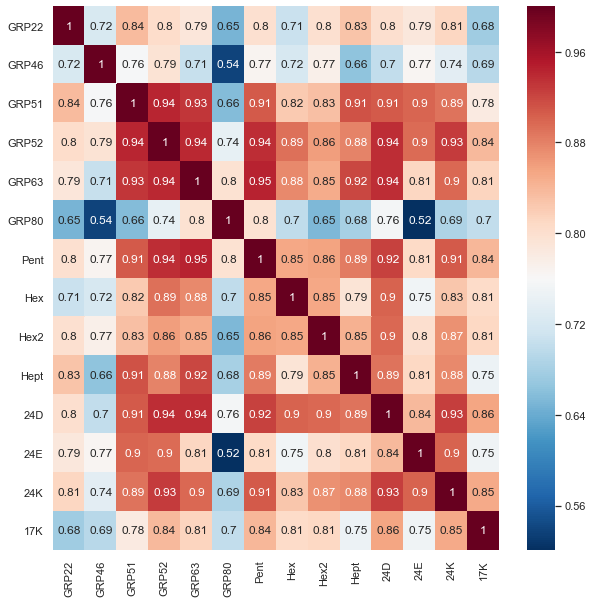

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
GRP22,1.000000,0.722377,0.836773,0.803792,0.789401,0.649461,0.797929,0.706788,0.797912,0.828766,0.800247,0.787673,0.811199,0.675673
GRP46,0.722377,1.000000,0.757863,0.794606,0.706165,0.538329,0.767457,0.719306,0.773813,0.663926,0.702390,0.765504,0.735250,0.694839
GRP51,0.836773,0.757863,1.000000,0.942166,0.932199,0.656255,0.907476,0.822380,0.832006,0.912472,0.907763,0.899571,0.891026,0.782896
GRP52,0.803792,0.794606,0.942166,1.000000,0.940683,0.740080,0.937851,0.891528,0.860019,0.878750,0.938012,0.897039,0.927946,0.839041
GRP63,0.789401,0.706165,0.932199,0.940683,1.000000,0.797049,0.945441,0.875931,0.848440,0.920637,0.938189,0.812160,0.897880,0.813314
GRP80,0.649461,0.538329,0.656255,0.740080,0.797049,1.000000,0.796031,0.700388,0.652527,0.680640,0.756043,0.520883,0.685600,0.701743
Pent,0.797929,0.767457,0.907476,0.937851,0.945441,0.796031,1.000000,0.852978,0.856010,0.885834,0.923392,0.808892,0.906535,0.840328
Hex,0.706788,0.719306,0.822380,0.891528,0.875931,0.700388,0.852978,1.000000,0.852321,0.792267,0.900948,0.751415,0.826695,0.806090
Hex2,0.797912,0.773813,0.832006,0.860019,0.848440,0.652527,0.856010,0.852321,1.000000,0.845193,0.897433,0.800008,0.870537,0.809754
Hept,0.828766,0.663926,0.912472,0.878750,0.920637,0.680640,0.885834,0.792267,0.845193,1.000000,0.890864,0.810352,0.875452,0.746215


In [18]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

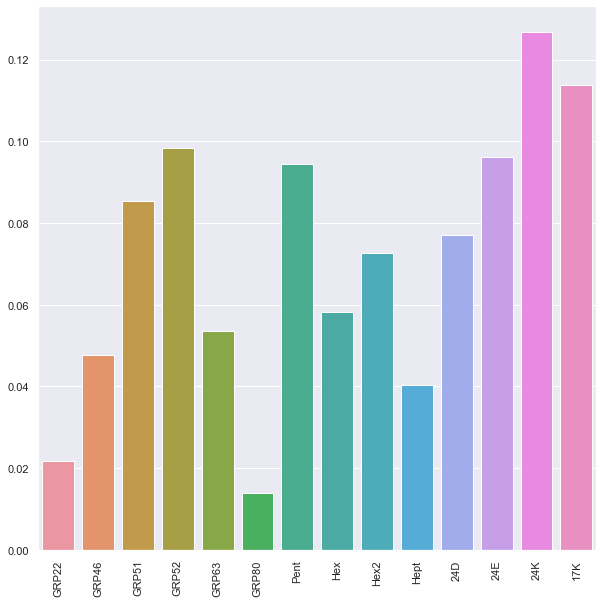

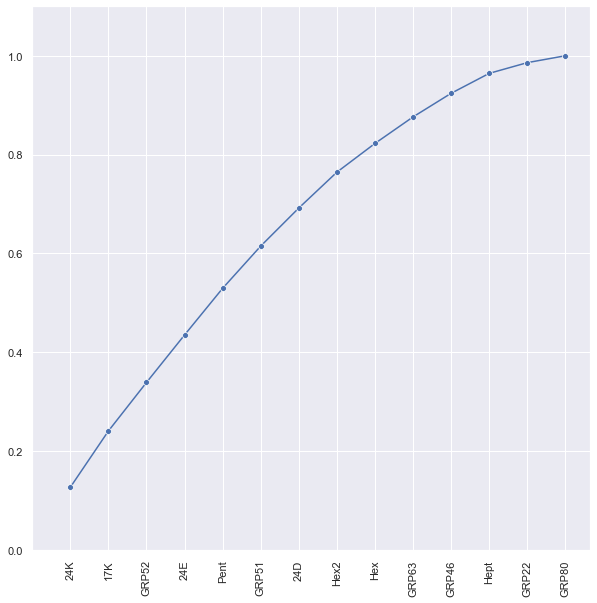

,Feature,Score
0,24K,0.126693
1,17K,0.113883
2,GRP52,0.098270
3,24E,0.096151
4,Pent,0.094421
5,GRP51,0.085471
6,24D,0.076999
7,Hex2,0.072545
8,Hex,0.058145
9,GRP63,0.053673


In [19]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

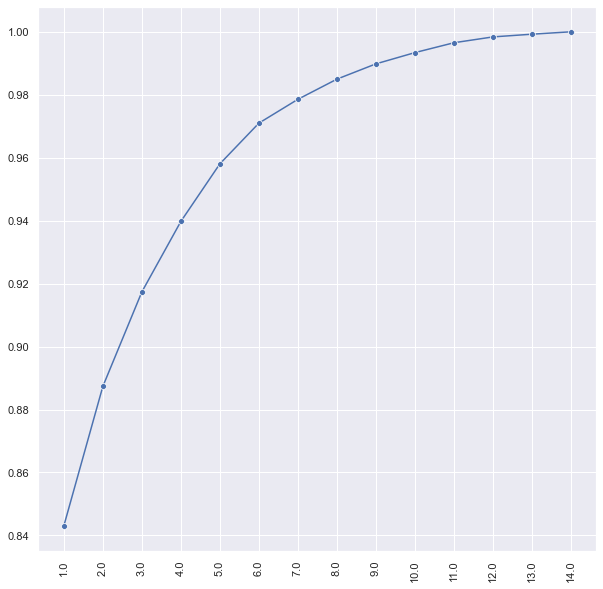

In [20]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [21]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [22]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.165551,0.261779,0.209124,0.183885,0.173189,0.157168,0.276736,0.315084,0.262816,0.219273,0.377583,0.353049,0.351178,0.297100
2,0.014334,0.851240,0.039329,0.020615,-0.126853,-0.245818,-0.012704,-0.144262,0.013404,-0.170530,-0.307058,0.201575,-0.072349,-0.079433
3,0.135360,-0.289242,0.138224,-0.013599,-0.042571,-0.374496,-0.112975,-0.459529,-0.028941,0.217626,0.030009,0.586862,0.240043,-0.248212
4,-0.352995,-0.143574,-0.144237,-0.062750,-0.216062,-0.489195,-0.270856,0.333810,0.104200,-0.285136,0.042700,0.191507,0.097183,0.468134
5,0.114757,0.002549,0.063121,0.025561,0.037318,-0.220287,-0.227999,0.629210,0.157338,0.114264,0.078088,0.043378,-0.192143,-0.633773
6,0.237211,0.076813,-0.261136,-0.241643,-0.177812,-0.060289,-0.205358,-0.248176,0.730771,0.185898,0.143868,-0.281595,0.037331,0.047549
7,0.292685,0.002063,-0.342969,-0.053848,-0.201990,0.479661,-0.287005,0.053183,-0.088754,-0.496145,0.114151,0.304202,0.233689,-0.153337
8,-0.664143,0.086522,-0.163444,0.043501,0.034848,0.021564,0.246722,-0.135993,0.157116,-0.150610,0.275606,-0.085030,0.354164,-0.431030
9,-0.366181,-0.076047,0.111180,0.101607,0.072180,0.379249,-0.136583,-0.114252,0.375365,-0.000812,-0.059501,0.429076,-0.571080,0.044910


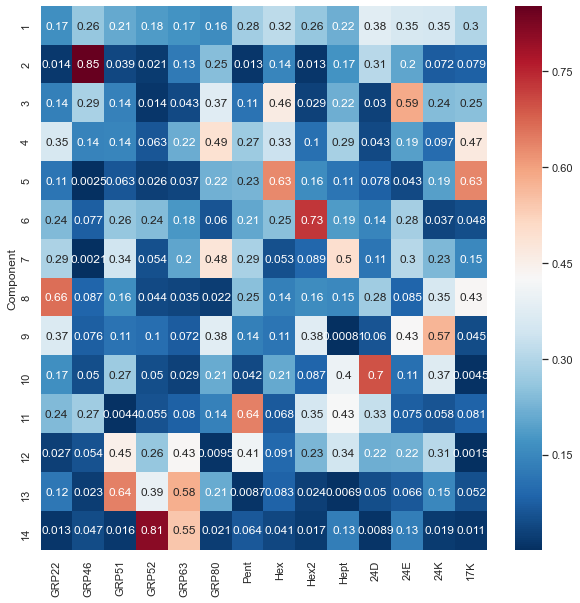

In [23]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

In [24]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [25]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.056989,0.116951,0.073260,0.079318,0.063070,0.052069,0.094130,0.107696,0.099841,0.069631,0.138483,0.114654,0.114884,0.116337
2,0.004934,0.380296,0.013778,0.008892,0.046196,0.081438,0.004321,0.049309,0.005092,0.054153,0.112617,0.065462,0.023668,0.031104
3,0.046596,0.129220,0.048423,0.005866,0.015503,0.124068,0.038428,0.157067,0.010994,0.069108,0.011006,0.190586,0.078527,0.097194
4,0.121515,0.064142,0.050529,0.027067,0.078683,0.162067,0.092130,0.114096,0.039585,0.090546,0.015661,0.062193,0.031792,0.183310
5,0.039504,0.001139,0.022113,0.011026,0.013590,0.072980,0.077553,0.215064,0.059771,0.036285,0.028640,0.014087,0.062857,0.248170
6,0.081657,0.034317,0.091481,0.104232,0.064753,0.019973,0.069851,0.084827,0.277613,0.059033,0.052766,0.091449,0.012212,0.018619
7,0.100754,0.000922,0.120149,0.023227,0.073558,0.158909,0.097623,0.018178,0.033717,0.157553,0.041866,0.098791,0.076449,0.060043
8,0.228624,0.038654,0.057258,0.018764,0.012691,0.007144,0.083921,0.046482,0.059687,0.047827,0.101082,0.027614,0.115861,0.168781
9,0.126054,0.033974,0.038949,0.043828,0.026286,0.125643,0.046458,0.039051,0.142597,0.000258,0.021823,0.139344,0.186822,0.017586


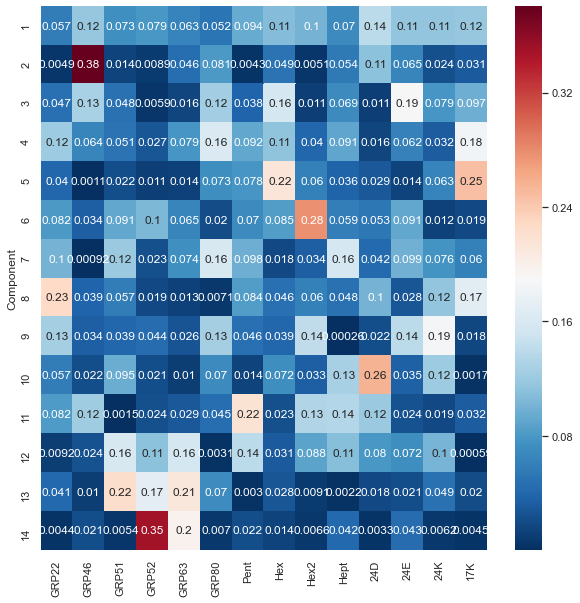

In [26]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

In [27]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

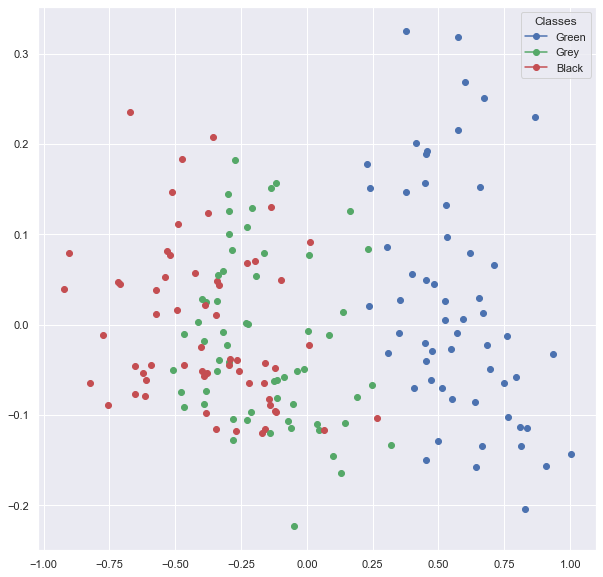

In [28]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['Green', 'Grey', 'Black'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

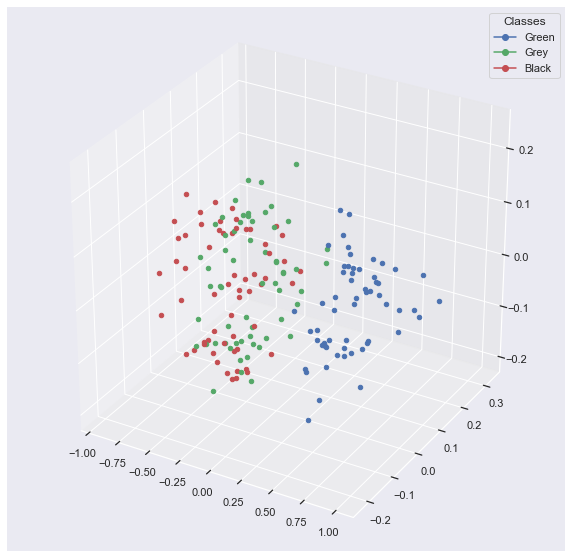

In [29]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['Green', 'Grey', 'Black'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

Require 7 features to account for ~98% of the variation in the data, so won't use PCA to reduce the number of features. However, will still run PCA to ensure that the 14 features are orthogonal.

In [30]:
n_components = 14

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation to 14 orthogonal dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [31]:
cv_folds = 10  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 100.0}
Best score: 0.8549019607843137






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 100.0}
Best score: 0.8549019607843137
All parameter combinations tested:
1 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 100.0} 0.821
2 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1.0} nan
3 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C':

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.5}
Best score: 0.8264705882352942






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.5}
Best score: 0.8264705882352942
All parameter combinations tested:
1 {'LinearSVC__C': 0.08838834764831845} 0.826
2 {'LinearSVC__C': 4.0} 0.815
3 {'LinearSVC__C': 64.0} 0.815
4 {'LinearSVC__C': 32768.0} 0.815
5 {'LinearSVC__C': 128.0} 0.815
6 {'LinearSVC__C': 0.0625} 0.815
7 {'LinearSVC__C': 16384.0} 0.815
8 {'LinearSVC__C': 362.03867196751236} 0.815
9 {'LinearSVC__C': 0.03125} 0.76
10 {'LinearSVC__C': 22.627416997969522} 0.815
11 {'LinearSVC__C': 256.0} 0.815
12 {'LinearSVC__C': 11.313708498984761} 0.815
13 {'LinearSVC__C': 5792.618751480198} 0.815
14 {'LinearSVC__C': 512.0} 0.815
15 {'LinearSVC__C': 2048.0} 0.815
16 {'LinearSVC__C': 0.5} 0.826
17 {'LinearSVC__C': 2896.309375740099} 0.815
18 {'LinearSVC__C': 1024.0} 0.815
19 {'LinearSVC__C': 181.01933598375618} 0.815
20 {'LinearSVC__C': 23170.475005920

In [32]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'sag', 'Logisti...",0.854902,0.768072,0.145611
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'distance', ...",0.843791,0.799072,0.141511
2,GaussianNB,no_balancing,{},0.787908,0.787908,0.127731
3,LinearSVC,no_balancing,{'LinearSVC__C': 0.5},0.826471,0.814458,0.105327
4,SVC,no_balancing,"{'SVC__gamma': 0.00048828125, 'SVC__C': 512.0}",0.870915,0.623137,0.177563


So, from this spot check, a **support vector classifier with radial basis function kernel** does a good job.

So, run hyperparameter optimisation for SVC.

In [33]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.1767766952966369, 'SVC__C': 2.8284271247461903}
Best score: 0.8712418300653596


In [35]:
grid_tuned_params = {'C': np.linspace(0.1, 10, 100),
                     'gamma': np.linspace(0.01, 1, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 3.8000000000000003, 'SVC__gamma': 0.19}
Best score: 0.8882352941176471


### So, optimal hyperparameter combination:
- C = 3.8
- gamma = 0.19

In [36]:
final_params = {'C': 3.8,
                'gamma': 0.19}

So, with these selected hyperparameters, loop through model training and testing leaving one tea subclass of each class (= 3 tea subclasses in total, one green, one grey and one black) out each time. Calculate average and median statistics on the test set.

In [37]:
# Because I am now leaving one tea subclass out for testing each time, the number of cross-validation folds
# used during testing needs to be reduced by 1
cv_folds = 9

In [38]:
class_iter = ml.randomly_pick_subclasses(percent_test=0.1)

In [39]:
class_iter

[['Grey_Tesco', 'Black_Tesco', 'Green_Qi'],
 ['Grey_Diplomat', 'Black_Diplomat', 'Green_Sainsburys'],
 ['Grey_Pukka', 'Black_Yorkshire', 'Green_Doubledragon'],
 ['Grey_Devonshire', 'Black_Pukka', 'Green_Twinings'],
 ['Grey_Joes', 'Black_Sainsburysgold', 'Green_Handb'],
 ['Grey_Clipper', 'Black_Tetley', 'Green_Diplomat'],
 ['Grey_Asda', 'Black_Pgtips', 'Green_Clipper'],
 ['Grey_Twinings', 'Black_Twinings', 'Green_Tetley'],
 ['Grey_Mands', 'Black_Dragonfly', 'Green_Joes'],
 ['Grey_Coop', 'Black_Clipper', 'Green_Dragonfly']]

In [65]:
models = []
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
cohen_kappa_scores = []
predicted_classes = []
true_classes = []
test_x_data = []

for subclass_list in class_iter:
    ml.split_train_test_data(randomise=False, percent_test='', test_analytes=subclass_list)

    scoring_funcs={accuracy_score: {},
                   recall_score: {'average': 'macro'},
                   precision_score: {'average': 'macro'},
                   f1_score: {'average': 'macro'},
                   cohen_kappa_score: {}}

    svc_clf, train_scores, test_scores, predictions = ml.run_ml(
        clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups,
        x_test=ml.test_x, y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
        tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
        resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds, draw_conf_mat=False
    )

    models.append(copy.deepcopy(svc_clf))
    accuracy_scores.append(copy.deepcopy(test_scores['no_balancing']['accuracy_score']))
    recall_scores.append(copy.deepcopy(test_scores['no_balancing']['recall_score']))
    precision_scores.append(copy.deepcopy(test_scores['no_balancing']['precision_score']))
    f1_scores.append(copy.deepcopy(test_scores['no_balancing']['f1_score']))
    cohen_kappa_scores.append(copy.deepcopy(test_scores['no_balancing']['cohen_kappa_score']))
    predicted_classes.append(copy.deepcopy(predictions.tolist()))
    true_classes.append(copy.deepcopy(ml.test_y.tolist()))
    test_x_data.append(copy.deepcopy(ml.test_x.tolist()))
    
test_x_data = [row for sub_df in test_x_data for row in sub_df]

Model cross-validation score: [0.66666667 0.94444444 0.88888889 0.94444444 0.94444444 0.83333333
 0.77777778 0.88888889 1.        ]
accuracy_score: 0.9411764705882353
recall_score: 0.9444444444444445
precision_score: 0.9523809523809524
f1_score: 0.9440559440559441
cohen_kappa_score: 0.9114583333333334
Model cross-validation score: [0.66666667 1.         0.94444444 1.         0.77777778 0.83333333
 0.83333333 1.         0.70588235]
accuracy_score: 0.8333333333333334
recall_score: 0.8333333333333334
precision_score: 0.8380952380952381
f1_score: 0.8321678321678321
cohen_kappa_score: 0.75
Model cross-validation score: [0.77777778 0.94444444 0.83333333 0.88888889 0.94444444 0.77777778
 0.72222222 0.83333333 1.        ]
accuracy_score: 0.9411764705882353
recall_score: 0.9444444444444445
precision_score: 0.9523809523809524
f1_score: 0.9440559440559441
cohen_kappa_score: 0.9114583333333334
Model cross-validation score: [0.66666667 0.94444444 0.83333333 0.88888889 0.88888889 0.66666667
 0.83333

In [66]:
print('Accuracy')
print('Mean average: ', np.mean(accuracy_scores))
print('Median: ', np.median(accuracy_scores))
print('Population standard deviation: ', np.std(accuracy_scores))

print('\n\nRecall')
print('Mean average: ', np.mean(recall_scores))
print('Median: ', np.median(recall_scores))
print('Population standard deviation: ', np.std(recall_scores))

print('\n\nPrecision')
print('Mean average: ', np.mean(precision_scores))
print('Median: ', np.median(precision_scores))
print('Population standard deviation: ', np.std(precision_scores))

print('\n\nF1')
print('Mean average: ', np.mean(f1_scores))
print('Median: ', np.median(f1_scores))
print('Population standard deviation: ', np.std(f1_scores))

print('\n\nCohen\'s kappa')
print('Mean average: ', np.mean(cohen_kappa_scores))
print('Median: ', np.median(cohen_kappa_scores))
print('Population standard deviation: ', np.std(cohen_kappa_scores))

Accuracy
Mean average:  0.8826797385620914
Median:  0.8888888888888888
Population standard deviation:  0.05165983468201277


Recall
Mean average:  0.8833333333333334
Median:  0.8888888888888888
Population standard deviation:  0.05241100628920337


Precision
Mean average:  0.9042460317460318
Median:  0.9166666666666666
Population standard deviation:  0.049853669092610096


F1
Mean average:  0.8800843600843601
Median:  0.8857142857142857
Population standard deviation:  0.05463879205459989


Cohen's kappa
Mean average:  0.8239583333333333
Median:  0.8333333333333333
Population standard deviation:  0.07742043406692523


In [1]:
y_pred = [prediction for sublist in predicted_classes for prediction in sublist]
y_true = [true_label for sublist in true_classes for true_label in sublist]

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

normalisation_methods = OrderedDict({None: '',
                                     'true': '_recall',
                                     'pred': '_precision'})
for method, method_label in normalisation_methods.items():
    print(method)
    plt.clf()
    labels = unique_labels(y_true, y_pred)
    # Below ensures that predicted and true labels are on the correct axes,
    # so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels, normalize=method),
        cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label',
           ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.savefig('{}/SVC{}_confusion_matrix.svg'.format(ml.results_dir, method_label))
    plt.show()

NameError: name 'predicted_classes' is not defined

So, model can be extrapolated to successfully classify subclasses of tea it hasn't previously seen, which is very promising for analysis of e.g. medical data (which will typically require a model to make predictions for data from a patient it has not previously been trained on), etc.

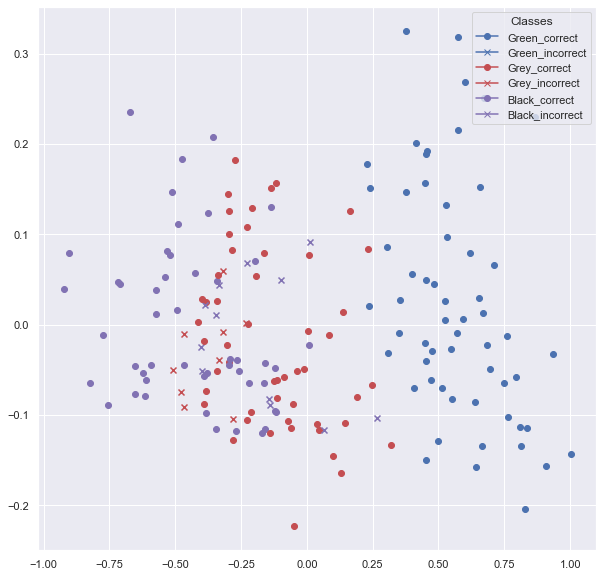

In [74]:
X_test_reduced = pca_fitted.transform(X=test_x_data)
y_test_pred_hue = []
for index, y in enumerate(y_true):
    if y_pred[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['Green_correct', 'Green_incorrect', 'Grey_correct', 'Grey_incorrect',
                'Black_correct', 'Black_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)